In [50]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]

In [3]:
df_original = pd.read_csv("Diabetes.csv")
df_original.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
cols = [c for c in df_original.columns if c not in ['Pregnancies','Outcome'] ]
df = df_original.copy()

In [21]:
df[cols] = df[cols].replace({0: np.NaN})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
Outcome                     768 non-null int64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Scatter Matrix

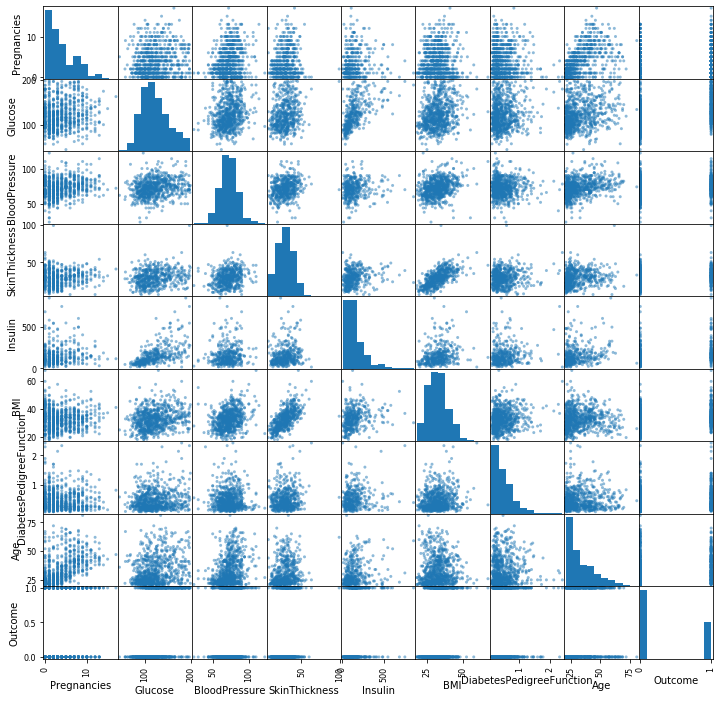

In [29]:
pd.plotting.scatter_matrix(df, figsize=(12,12));

In [33]:
df = df.dropna()
colors = df['Outcome'].map(lambda x: "#44d9ff" if x else "#f95b4a")
colors.head()

3     #f95b4a
4     #44d9ff
6     #44d9ff
8     #44d9ff
13    #44d9ff
Name: Outcome, dtype: object

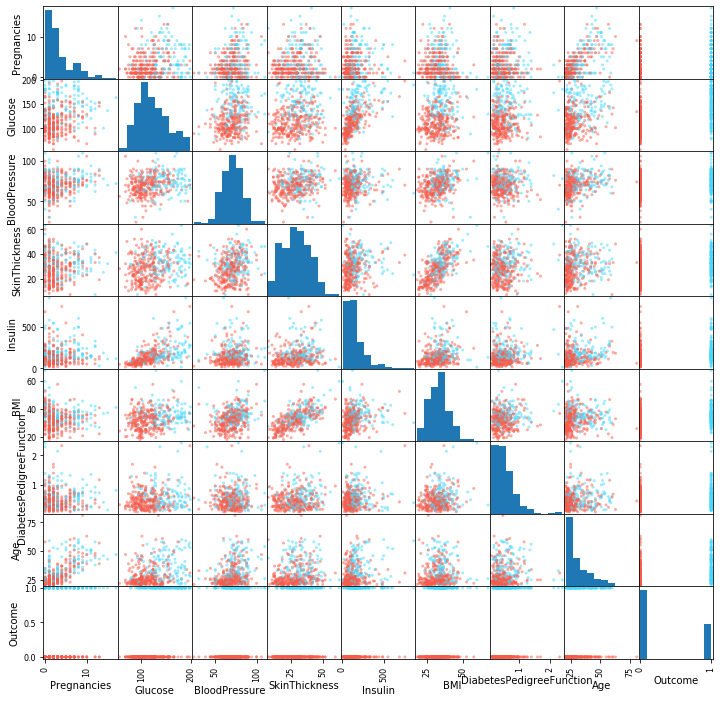

In [35]:
pd.plotting.scatter_matrix(df, figsize=(12,12), color=colors);

### Correlation Plot

In [36]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


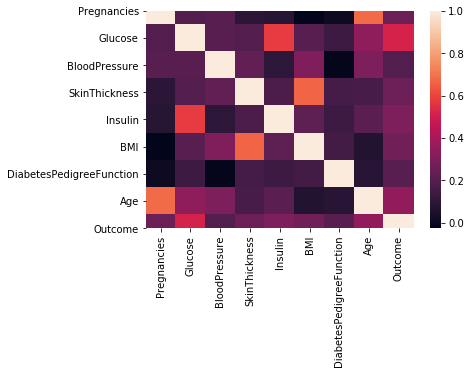

In [38]:
sb.heatmap(df.corr());

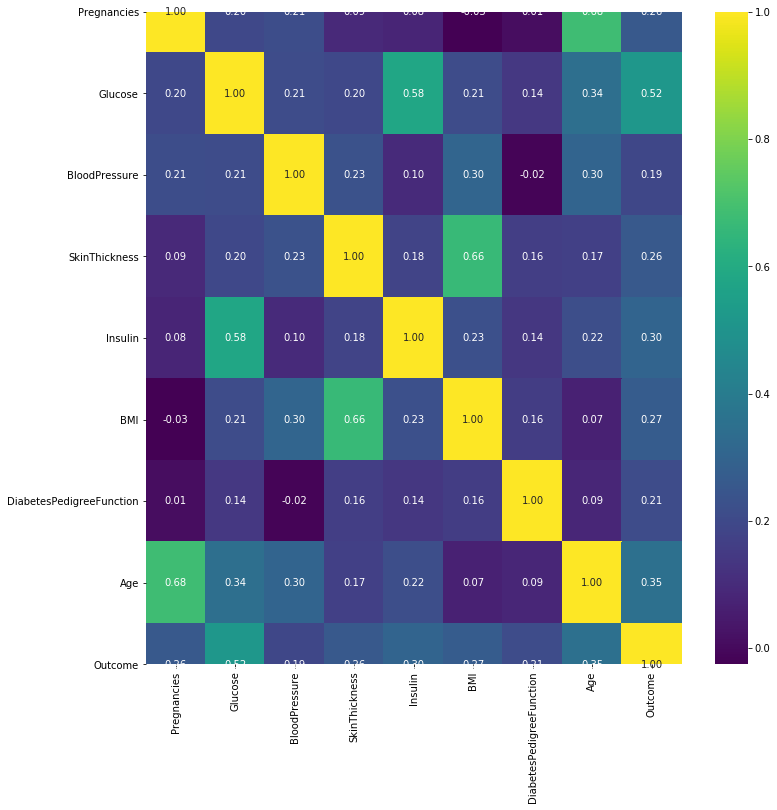

In [43]:
sb.heatmap(df.corr(), annot=True, cmap="viridis", fmt="0.2f");

### 2D Histograms

In [44]:
d1 = pd.read_csv("height_weight.csv")
d1.head()

,sex,height,weight
0,1,71.74,259.88
1,1,71.00,186.73
2,2,63.83,172.17
3,1,67.74,174.66
4,2,67.28,169.20


In [45]:
d1.info()
d1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 3 columns):
sex       4231 non-null int64
height    4231 non-null float64
weight    4231 non-null float64
dtypes: float64(2), int64(1)
memory usage: 99.3 KB


,sex,height,weight
count,4231.000000,4231.000000,4231.000000
mean,1.540061,66.903607,174.095122
std,0.498451,4.313004,38.896171
min,1.000000,55.400000,96.590000
25%,1.000000,63.730000,144.315000
50%,2.000000,66.630000,170.100000
75%,2.000000,69.970000,198.660000
max,2.000000,79.610000,298.440000


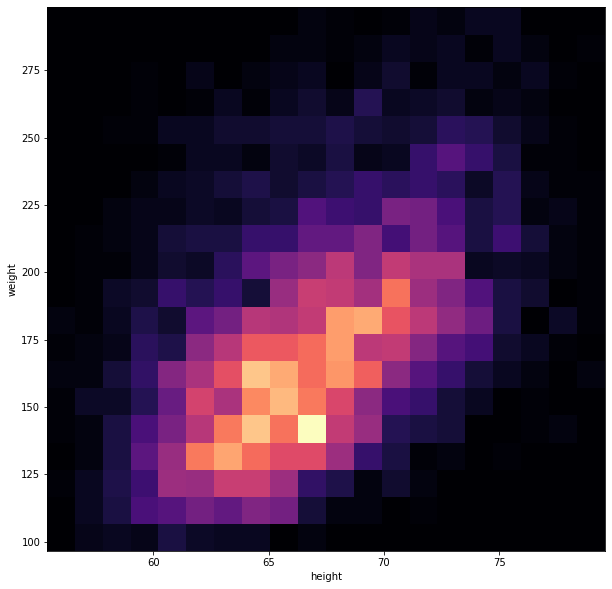

In [52]:
plt.hist2d(d1['height'], d1['weight'], bins=20, cmap='magma')
plt.xlabel('height')
plt.ylabel('weight');

### Contour Plots

Text(0, 0.5, 'Weight')

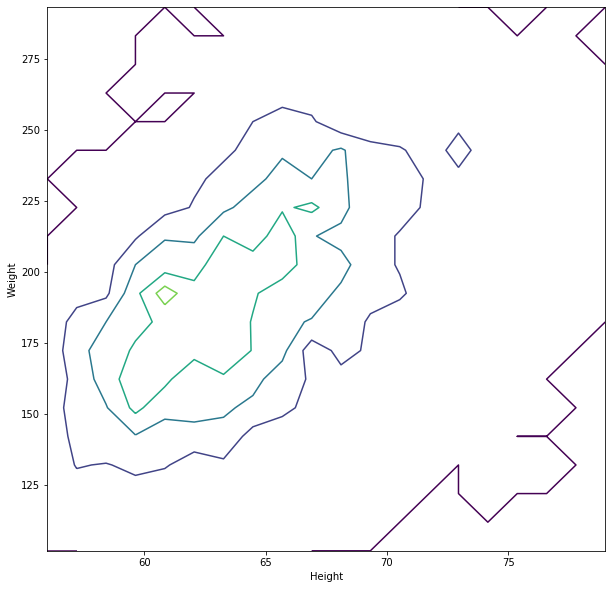

In [59]:
hist, x_edge, y_edge = np.histogram2d(d1["height"], d1["weight"], bins=20)
#np.histogram2d returns 2d histogram and edges of bins
x_center = 0.5 * (x_edge[1:] + x_edge[:-1])
y_center = 0.5 * (y_edge[1:] + y_edge[:-1])
plt.contour(x_center, y_center, hist, levels=4)
plt.xlabel("Height")
plt.ylabel("Weight")

### KDE plots

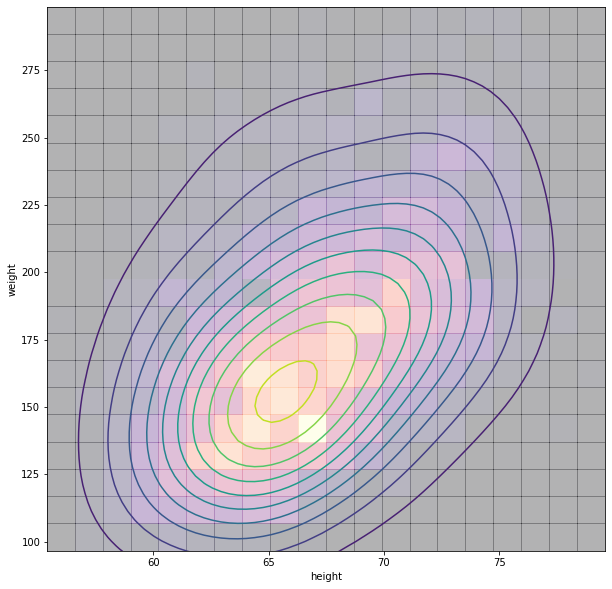

In [63]:
sb.kdeplot(d1['height'],d1['weight'], cmap='viridis', bw=(2,20))
plt.hist2d(d1['height'],d1['weight'], cmap='magma', bins=20, alpha=0.3);

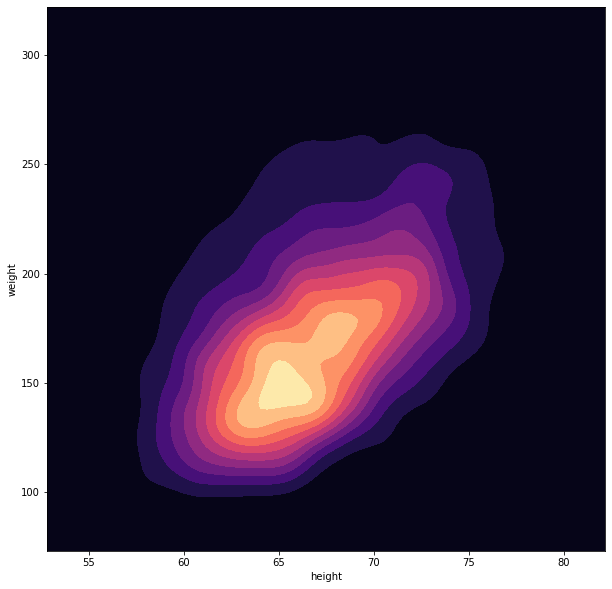

In [65]:
sb.kdeplot(d1['height'],d1['weight'], cmap='magma', shade=True);

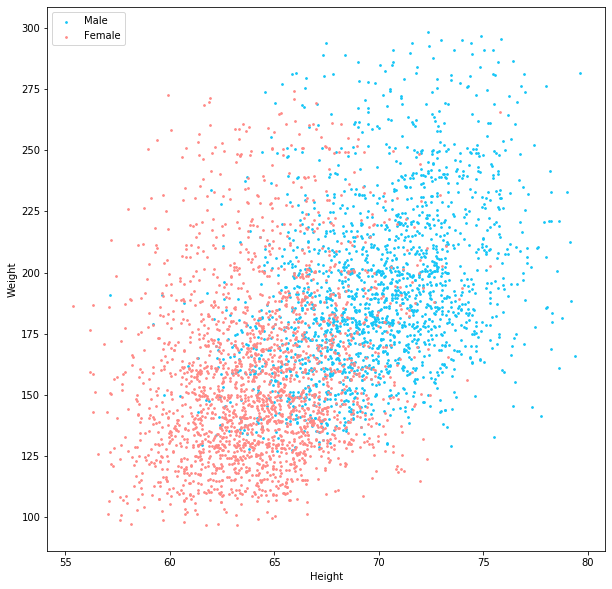

In [68]:
m = d1["sex"] ==1 
plt.scatter(d1.loc[m, 'height'], d1.loc[m, 'weight'], s=3, label='Male', c='#16c6f7')
plt.scatter(d1.loc[~m, 'height'], d1.loc[~m, 'weight'], s=3, label='Female', c='#ff8b87')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc=2);